In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_excel('AB_NYC_2019 (3).xlsx')

In [9]:
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48869 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48873 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [13]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,2018-10-04 01:47:23.910099456,1.373221,7.143982,112.781327
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,2011-03-28 00:00:00,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,2018-07-08 00:00:00,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,2019-05-19 00:00:00,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2019-06-23 00:00:00,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289


In [21]:
df.isnull().sum()

id                                    0
name                                 26
host_id                               0
host_name                            22
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [33]:
df2=df.dropna(subset=['name', 'host_name'])

In [35]:
df2.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64

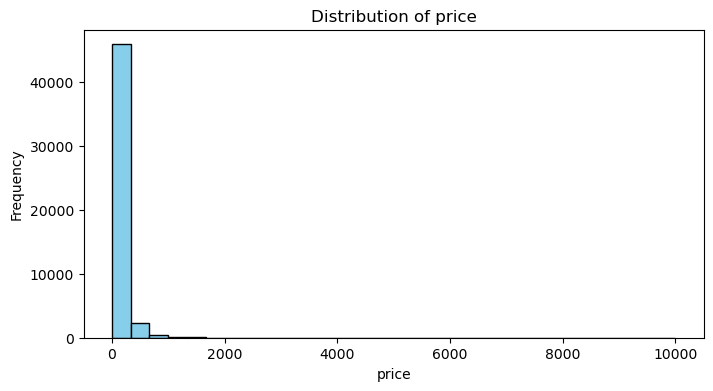

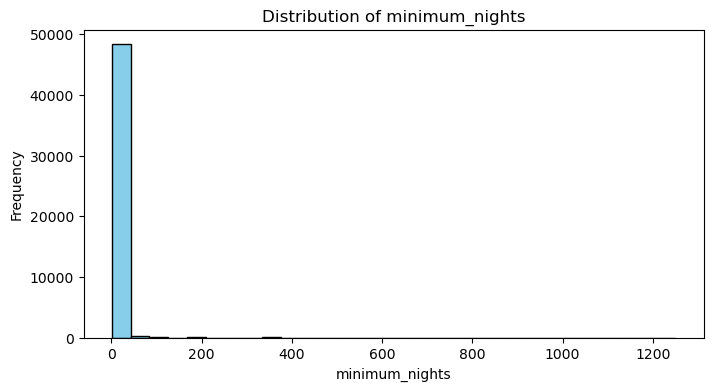

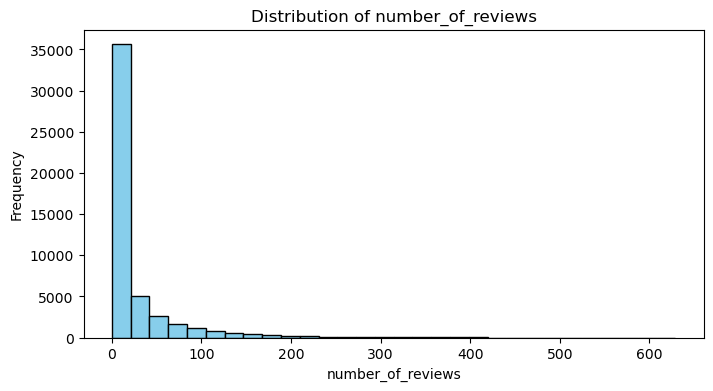

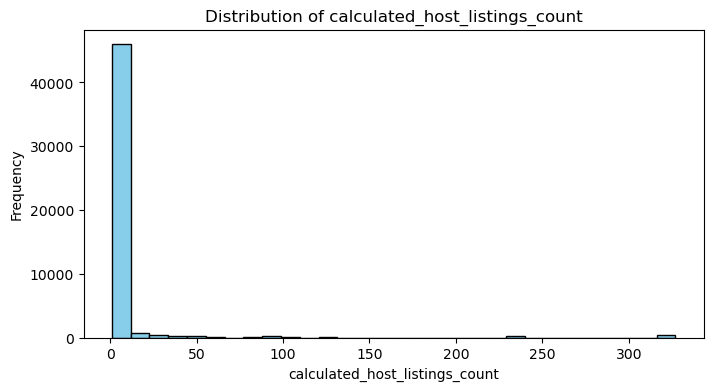

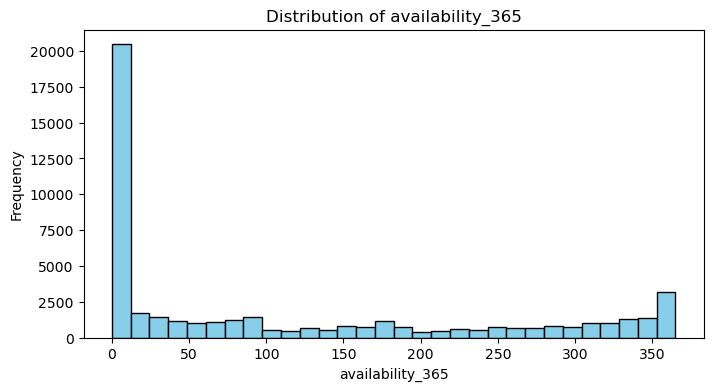

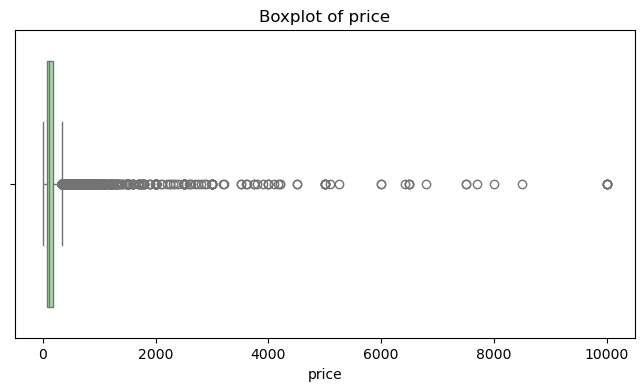

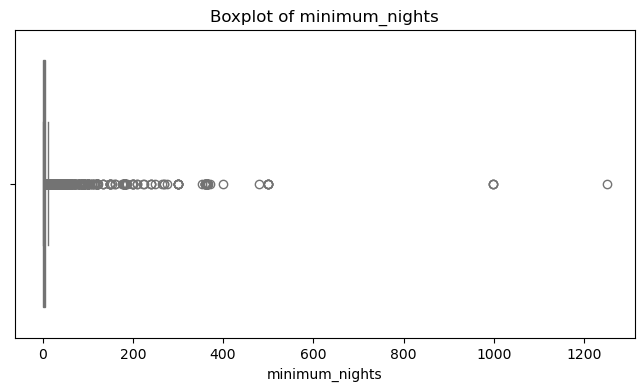

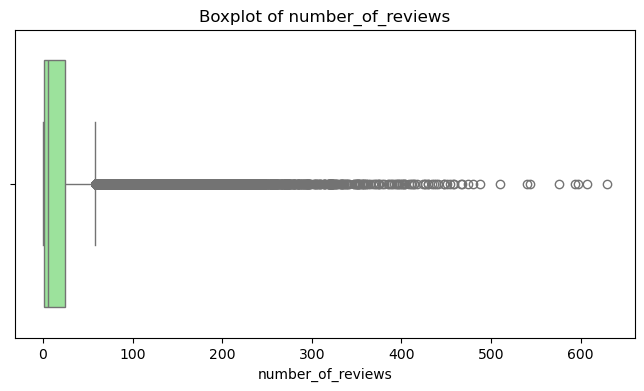

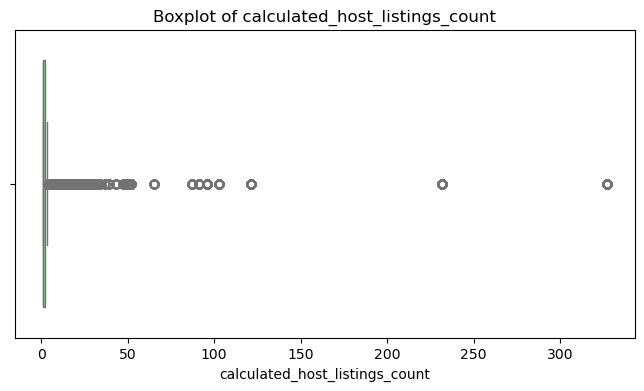

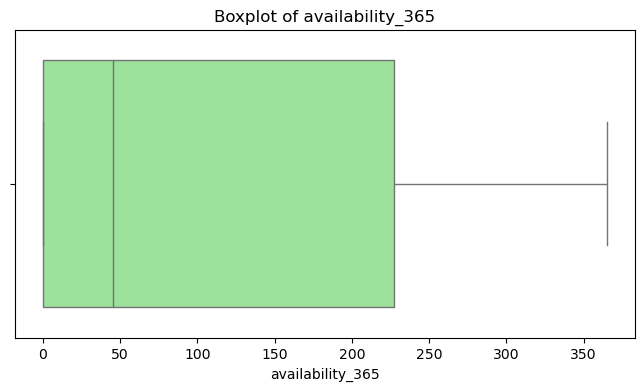

In [86]:
import os

# Create a folder to save the images (if it doesn't already exist)
output_folder = "plots"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Univariate analysis for numerical variables
numerical_columns = ['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']

# 1. Histograms for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df2[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Save the histogram as an image
    plt.savefig(os.path.join(output_folder, f'histogram_{col}.png'))
    
    # Display the histogram
    plt.show()

    # Close the plot to avoid overlap in the next iteration
    plt.close()

# 2. Boxplots for numerical columns to detect outliers
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df2[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    
    # Save the boxplot as an image
    plt.savefig(os.path.join(output_folder, f'boxplot_{col}.png'))
    
    # Display the boxplot
    plt.show()

    # Close the plot to avoid overlap in the next iteration
    plt.close()


In [88]:
# Summary of histograms and boxplots for numerical columns

numerical_columns = ['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']

# Function to summarize the statistics
def summarize_column(col):
    summary = {}
    
    # Get histogram details
    summary['histogram'] = {
        'mean': df2[col].mean(),
        'median': df2[col].median(),
        'std_dev': df2[col].std(),
        'min': df2[col].min(),
        'max': df2[col].max(),
        '25th_percentile': df2[col].quantile(0.25),
        '50th_percentile': df2[col].quantile(0.5),
        '75th_percentile': df2[col].quantile(0.75),
    }
    
    # Get boxplot details (for outliers)
    summary['boxplot'] = {
        'q1': df2[col].quantile(0.25),
        'q3': df2[col].quantile(0.75),
        'iqr': df2[col].quantile(0.75) - df2[col].quantile(0.25),
        'outliers': df2[col][(df2[col] < df2[col].quantile(0.25) - 1.5 * (df2[col].quantile(0.75) - df2[col].quantile(0.25))) | (df2[col] > df2[col].quantile(0.75) + 1.5 * (df2[col].quantile(0.75) - df2[col].quantile(0.25)))].count()
    }
    
    return summary

# Generate and print summaries for each column
for col in numerical_columns:
    summary = summarize_column(col)
    print(f"Summary for {col}:")
    print(f"Histogram Summary: Mean = {summary['histogram']['mean']}, Median = {summary['histogram']['median']}, Std Dev = {summary['histogram']['std_dev']}")
    print(f"Boxplot Summary: Q1 = {summary['boxplot']['q1']}, Q3 = {summary['boxplot']['q3']}, IQR = {summary['boxplot']['iqr']}, Outliers = {summary['boxplot']['outliers']}")
    print("=" * 50)


Summary for price:
Histogram Summary: Mean = 152.75705775175547, Median = 106.0, Std Dev = 240.25608897552704
Boxplot Summary: Q1 = 69.0, Q3 = 175.0, IQR = 106.0, Outliers = 2971
Summary for minimum_nights:
Histogram Summary: Mean = 7.013593465310049, Median = 3.0, Std Dev = 20.02186444280066
Boxplot Summary: Q1 = 1.0, Q3 = 5.0, IQR = 4.0, Outliers = 6605
Summary for number_of_reviews:
Histogram Summary: Mean = 23.259463221896944, Median = 5.0, Std Dev = 44.543510650311944
Boxplot Summary: Q1 = 1.0, Q3 = 24.0, IQR = 23.0, Outliers = 6007
Summary for calculated_host_listings_count:
Histogram Summary: Mean = 7.148586402440273, Median = 1.0, Std Dev = 32.96828698318118
Boxplot Summary: Q1 = 1.0, Q3 = 2.0, IQR = 1.0, Outliers = 7071
Summary for availability_365:
Histogram Summary: Mean = 112.80228059041497, Median = 45.0, Std Dev = 131.62381865196636
Boxplot Summary: Q1 = 0.0, Q3 = 227.0, IQR = 227.0, Outliers = 0


C:\Users\aniki\AppData\Local\Temp\ipykernel_14964\2386927708.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df2[col], order=df2[col].value_counts().index, palette='viridis')


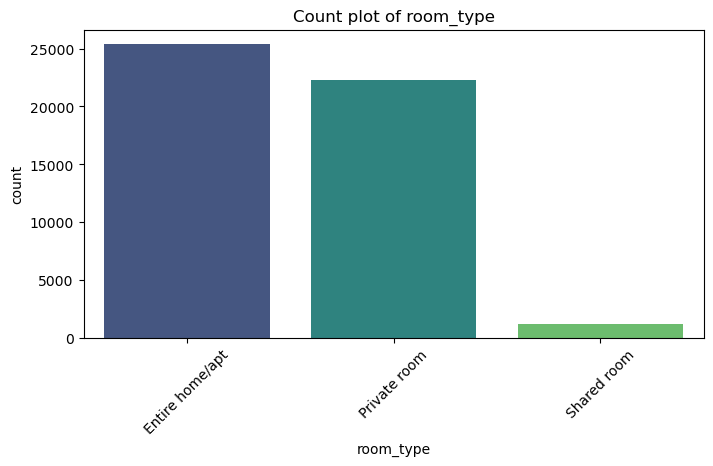

C:\Users\aniki\AppData\Local\Temp\ipykernel_14964\2386927708.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df2[col], order=df2[col].value_counts().index, palette='viridis')


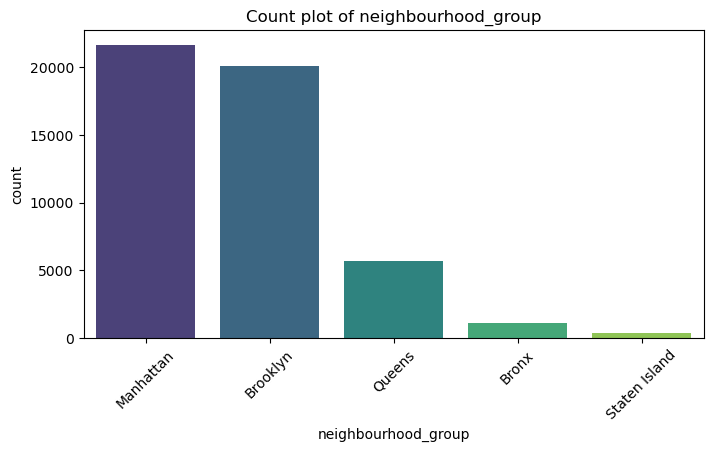

C:\Users\aniki\AppData\Local\Temp\ipykernel_14964\2386927708.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df2[col], order=df2[col].value_counts().index, palette='viridis')


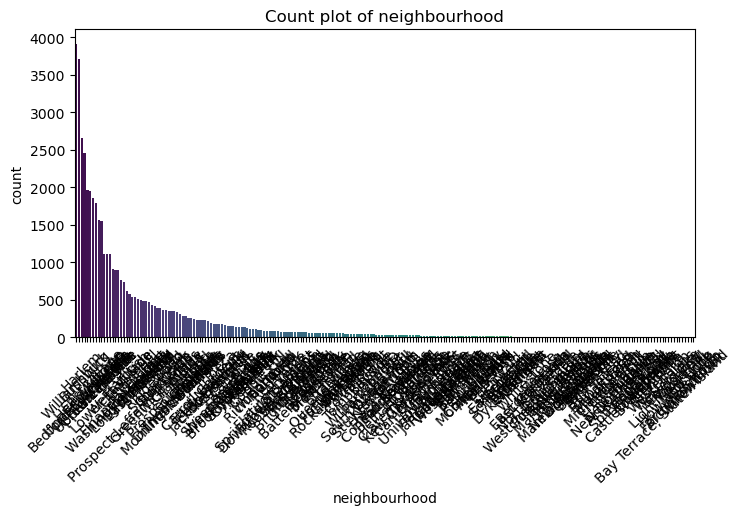

In [41]:
# 3. Count plots for categorical columns
categorical_columns = ['room_type', 'neighbourhood_group', 'neighbourhood']

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df2[col], order=df2[col].value_counts().index, palette='viridis')
    plt.title(f'Count plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [43]:
###Bivariate Analysis

<Axes: xlabel='neighbourhood_group', ylabel='price'>

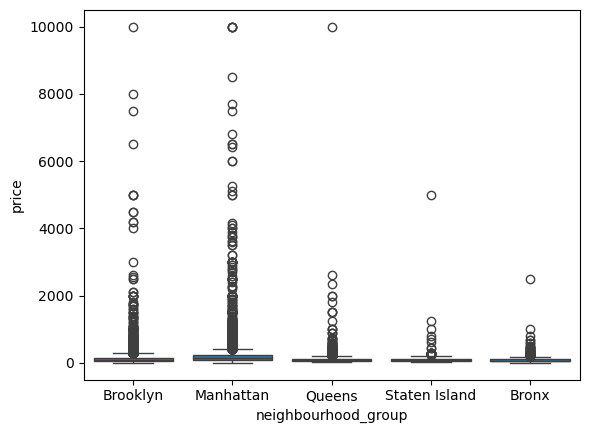

In [45]:
sns.boxplot(x='neighbourhood_group', y='price', data=df2)

Correlation Matrix:
                                   price  minimum_nights  number_of_reviews  \
price                           1.000000        0.042787          -0.047852   
minimum_nights                  0.042787        1.000000          -0.081554   
number_of_reviews              -0.047852       -0.081554           1.000000   
calculated_host_listings_count  0.057461        0.131312          -0.072427   
availability_365                0.081807        0.145956           0.171937   

                                calculated_host_listings_count  \
price                                                 0.057461   
minimum_nights                                        0.131312   
number_of_reviews                                    -0.072427   
calculated_host_listings_count                        1.000000   
availability_365                                      0.225792   

                                availability_365  
price                                   0.081807  
minimu

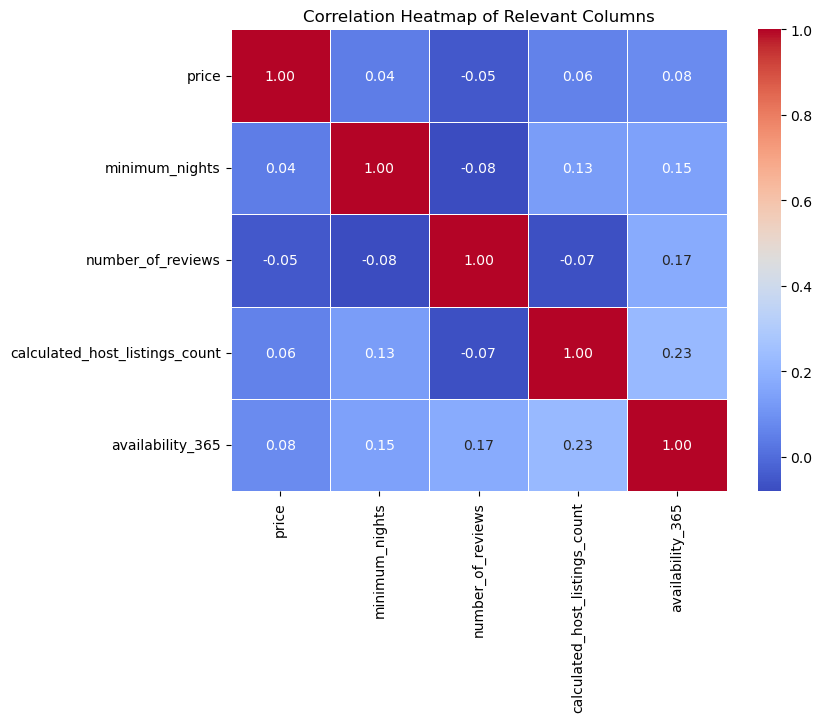

In [47]:
#Correlation analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numerical columns for correlation analysis
relevant_columns = ['price', 'minimum_nights', 'number_of_reviews',
                    'calculated_host_listings_count', 'availability_365']

# Compute the correlation matrix
correlation_matrix = df2[relevant_columns].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Relevant Columns')
plt.show()

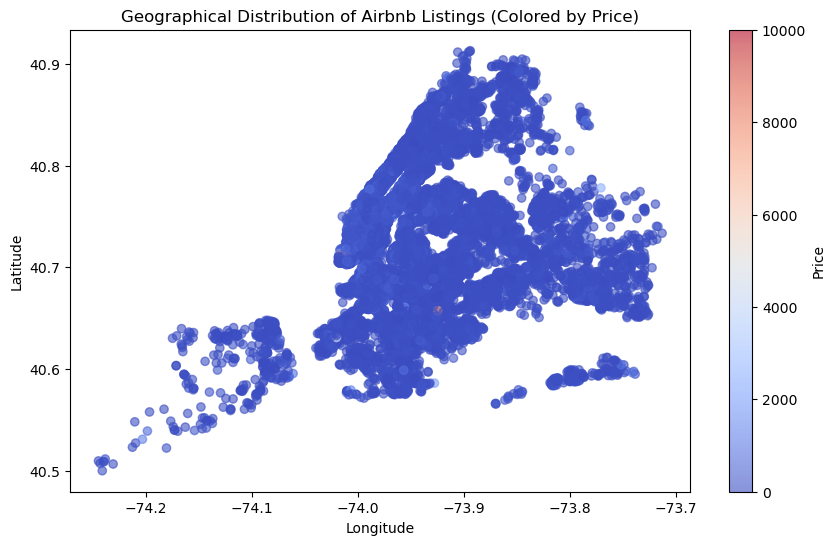

In [51]:
# Scatter plot for geographical distribution of listings, colored by price
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df2['longitude'], 
    df2['latitude'], 
    c=df2['price'], 
    cmap='coolwarm', 
    alpha=0.6
)
plt.colorbar(scatter, label='Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Airbnb Listings (Colored by Price)')
plt.show()


#Q1. Which types of hosts to acquire more and where?

C:\Users\aniki\AppData\Local\Temp\ipykernel_14964\2546309282.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['estimated_revenue'] = df2['price'] * df2['availability_365']
C:\Users\aniki\AppData\Local\Temp\ipykernel_14964\2546309282.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['host_category'] = df2['estimated_revenue'].apply(lambda x: 'High' if x >= median_revenue else 'Low')
C:\Users\aniki\AppData\Local\Temp\ipykernel_14964\2546309282.py:17: FutureWarning: 

Passing `palette` without ass

host_category
High    24428
Low     24419
Name: count, dtype: int64


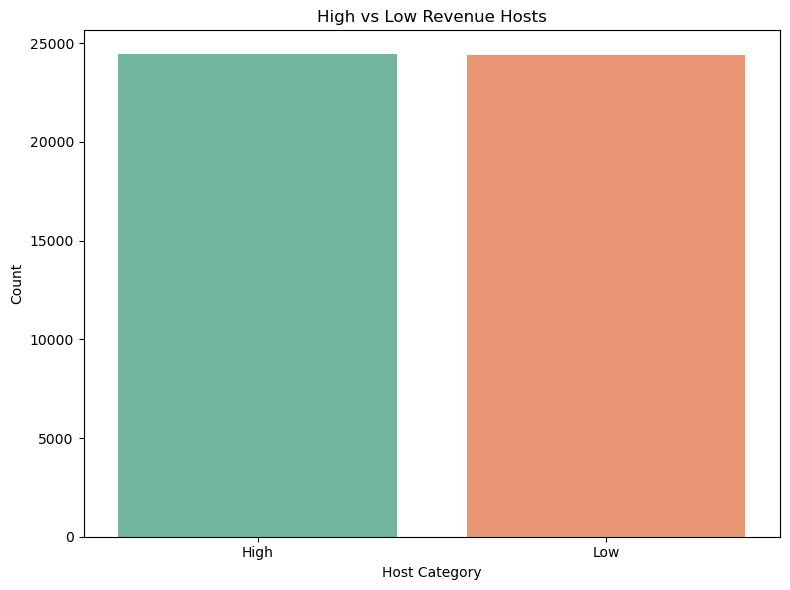

In [90]:
# Create a folder to save the visuals if it doesn't already exist
output_folder = 'visuals'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 1. Estimate revenue potential and classify hosts based on it
df2['estimated_revenue'] = df2['price'] * df2['availability_365']
median_revenue = df2['estimated_revenue'].median()
df2['host_category'] = df2['estimated_revenue'].apply(lambda x: 'High' if x >= median_revenue else 'Low')

# Display counts of high and low revenue hosts (Textual Output)
host_category_counts = df2['host_category'].value_counts()
print(host_category_counts)

# Visual Output: Bar plot for host category counts
plt.figure(figsize=(8, 6))
sns.countplot(x='host_category', data=df2, palette='Set2')
plt.title('High vs Low Revenue Hosts')
plt.xlabel('Host Category')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'host_category_count_plot.png'))
plt.show()


    neighbourhood_group      neighbourhood  estimated_revenue
188       Staten Island     Fort Wadsworth      292000.000000
205       Staten Island      Randall Manor      111905.421053
34                Bronx          Riverdale       88673.454545
219       Staten Island        Willowbrook       87399.000000
121           Manhattan            Tribeca       83613.858757
95            Manhattan  Battery Park City       74408.666667
163              Queens           Neponsit       70670.000000
88             Brooklyn           Sea Gate       58640.142857
82             Brooklyn         Mill Basin       57636.500000
102           Manhattan  Flatiron District       53649.350000


C:\Users\aniki\AppData\Local\Temp\ipykernel_14964\1091212360.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='estimated_revenue', y='neighbourhood', data=location_performance.head(10), palette='viridis')


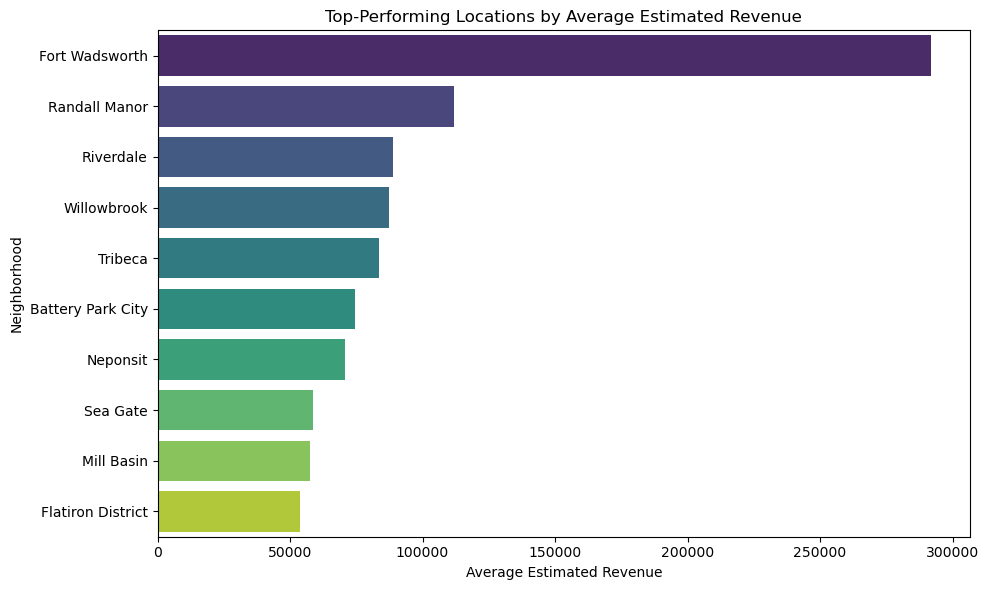

In [92]:
# 2. Group by neighbourhood_group and neighbourhood to find average revenue and counts
location_performance = df2.groupby(['neighbourhood_group', 'neighbourhood'])['estimated_revenue'].mean().reset_index()
location_performance = location_performance.sort_values(by='estimated_revenue', ascending=False)

# Display top-performing locations (Textual Output)
print(location_performance.head(10))

# Visual Output: Bar plot for top-performing locations by average estimated revenue
plt.figure(figsize=(10, 6))
sns.barplot(x='estimated_revenue', y='neighbourhood', data=location_performance.head(10), palette='viridis')
plt.title('Top-Performing Locations by Average Estimated Revenue')
plt.xlabel('Average Estimated Revenue')
plt.ylabel('Neighborhood')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'top_performing_locations_plot.png'))
plt.show()

   neighbourhood_group        room_type  count   avg_price
0                Bronx  Entire home/apt    378  127.645503
1                Bronx     Private room    652   66.788344
2                Bronx      Shared room     59   58.610169
3             Brooklyn  Entire home/apt   9553  178.362609
4             Brooklyn     Private room  10116   76.522044
5             Brooklyn      Shared room    413   50.527845
6            Manhattan  Entire home/apt  13190  249.238211
7            Manhattan     Private room   7970  116.812923
8            Manhattan      Shared room    480   88.977083
9               Queens  Entire home/apt   2095  147.049165
10              Queens     Private room   3370   71.776855
11              Queens      Shared room    198   69.020202
12       Staten Island  Entire home/apt    176  173.846591
13       Staten Island     Private room    188   62.292553
14       Staten Island      Shared room      9   57.444444


C:\Users\aniki\AppData\Local\Temp\ipykernel_14964\3705681602.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_price', y='room_type', data=room_type_analysis, palette='plasma')


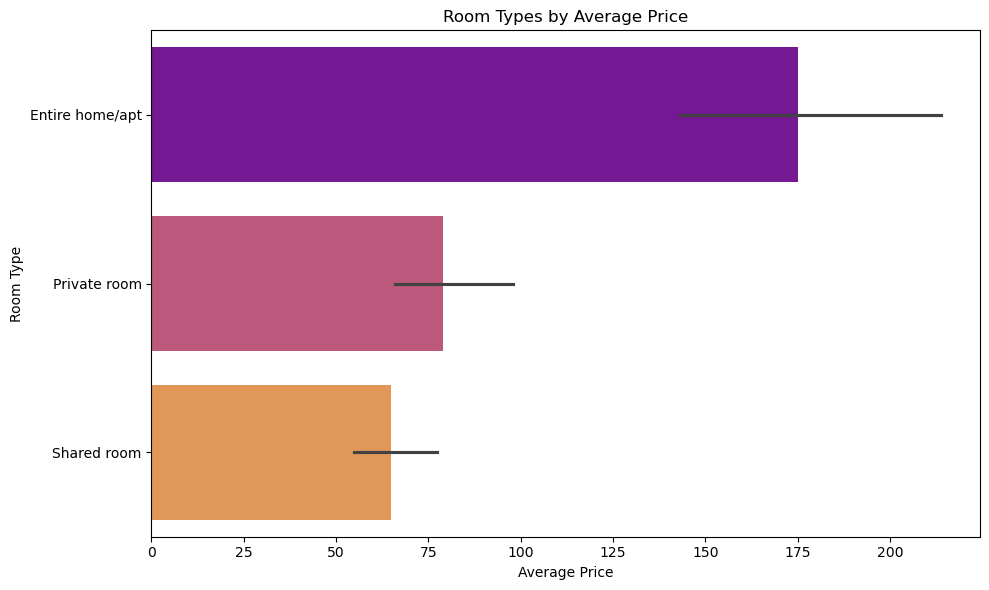

In [94]:
# 3. Group by neighbourhood_group and room_type to find average price and count
room_type_analysis = df2.groupby(['neighbourhood_group', 'room_type']).agg(
    count=('id', 'count'),
    avg_price=('price', 'mean')
).reset_index()

# Display room type analysis (Textual Output)
print(room_type_analysis)

# Visual Output: Bar plot for room types by average price
plt.figure(figsize=(10, 6))
sns.barplot(x='avg_price', y='room_type', data=room_type_analysis, palette='plasma')
plt.title('Room Types by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Room Type')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'room_type_analysis_plot.png'))
plt.show()

Top 10 neighborhoods with the most high-performing hosts:
    neighbourhood_group       neighbourhood  high_perf_host_count
50             Brooklyn  Bedford-Stuyvesant                  1891
93             Brooklyn        Williamsburg                  1470
105           Manhattan              Harlem                  1301
106           Manhattan      Hell's Kitchen                  1219
112           Manhattan             Midtown                   984
58             Brooklyn            Bushwick                   983
123           Manhattan     Upper East Side                   894
124           Manhattan     Upper West Side                   891
100           Manhattan        East Village                   707
65             Brooklyn       Crown Heights                   657


C:\Users\aniki\AppData\Local\Temp\ipykernel_14964\2799980266.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='high_perf_host_count', y='neighbourhood', data=high_perf_hosts_by_neighbourhood.head(10), palette='magma')


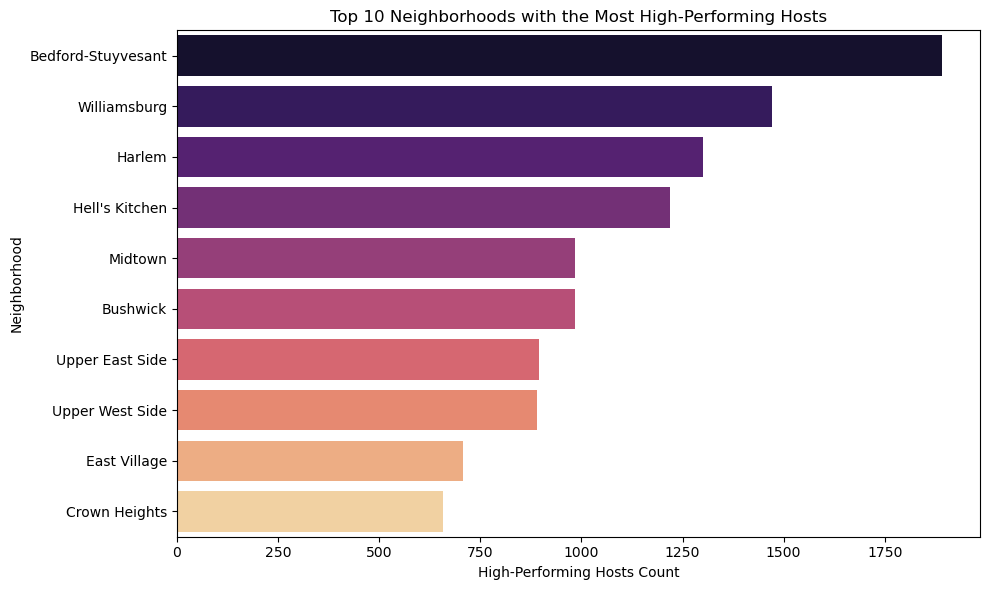

In [98]:
 #4. Count high-performing hosts by neighbourhood
high_perf_hosts_by_neighbourhood = df2[df2['host_category'] == 'High'].groupby(['neighbourhood_group', 'neighbourhood']).size().reset_index(name='high_perf_host_count')

# Sort neighborhoods by the number of high-performing hosts
high_perf_hosts_by_neighbourhood = high_perf_hosts_by_neighbourhood.sort_values(by='high_perf_host_count', ascending=False)

# Display top 10 neighborhoods with the most high-performing hosts (Textual Output)
print("Top 10 neighborhoods with the most high-performing hosts:")
print(high_perf_hosts_by_neighbourhood.head(10))

# Visual Output: Bar plot for top 10 neighborhoods with the most high-performing hosts
plt.figure(figsize=(10, 6))
sns.barplot(x='high_perf_host_count', y='neighbourhood', data=high_perf_hosts_by_neighbourhood.head(10), palette='magma')
plt.title('Top 10 Neighborhoods with the Most High-Performing Hosts')
plt.xlabel('High-Performing Hosts Count')
plt.ylabel('Neighborhood')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'high_perf_hosts_by_neighbourhood_plot.png'))
plt.show()

Top 10 neighborhoods by customer activity:
    neighbourhood_group       neighbourhood  number_of_reviews
50             Brooklyn  Bedford-Stuyvesant             110352
93             Brooklyn        Williamsburg              84708
105           Manhattan              Harlem              75819
58             Brooklyn            Bushwick              52508
106           Manhattan      Hell's Kitchen              49896
100           Manhattan        East Village              44642
99            Manhattan         East Harlem              36440
65             Brooklyn       Crown Heights              36408
124           Manhattan     Upper West Side              36058
123           Manhattan     Upper East Side              31686


C:\Users\aniki\AppData\Local\Temp\ipykernel_14964\1161865056.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=neighbourhood_reviews.head(10), x='number_of_reviews', y='neighbourhood', palette='Blues_d')


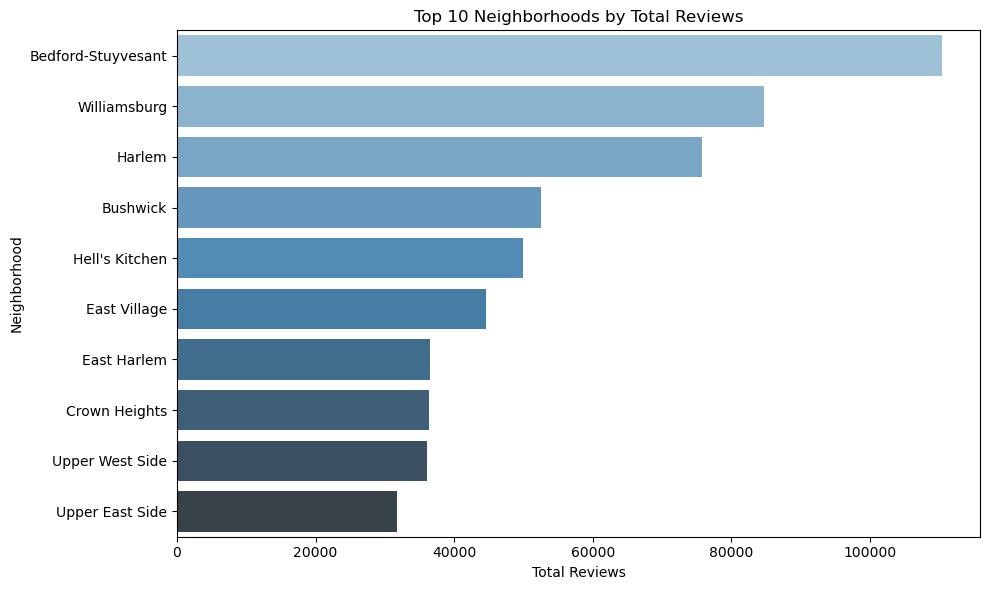

C:\Users\aniki\AppData\Local\Temp\ipykernel_14964\1161865056.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=neighbourhood_reviews.head(10), x='number_of_reviews', y='neighbourhood', palette='Blues_d')


In [102]:
# Count total reviews by neighbourhood
neighbourhood_reviews = df2.groupby(['neighbourhood_group', 'neighbourhood'])['number_of_reviews'].sum().reset_index()
neighbourhood_reviews = neighbourhood_reviews.sort_values(by='number_of_reviews', ascending=False)

# Display top 10 neighborhoods by total reviews
print("Top 10 neighborhoods by customer activity:")
print(neighbourhood_reviews.head(10))

# 1. Visualization - Bar plot for the top 10 neighborhoods by total reviews with a new color palette
plt.figure(figsize=(10, 6))
sns.barplot(data=neighbourhood_reviews.head(10), x='number_of_reviews', y='neighbourhood', palette='Blues_d')
plt.title('Top 10 Neighborhoods by Total Reviews')
plt.xlabel('Total Reviews')
plt.ylabel('Neighborhood')
plt.tight_layout()

# Show the plot
plt.show()

# 2. Save the plot as an image
plt.figure(figsize=(10, 6))
sns.barplot(data=neighbourhood_reviews.head(10), x='number_of_reviews', y='neighbourhood', palette='Blues_d')
plt.title('Top 10 Neighborhoods by Total Reviews')
plt.xlabel('Total Reviews')
plt.ylabel('Neighborhood')
plt.tight_layout()

# Save the plot as a .png file in the same folder as the notebook
plt.savefig('top_10_neighborhoods_by_reviews.png')

# Close the plot to free memory
plt.close()


Preferred pricing ranges based on percentiles:
25%     69.0
50%    106.0
75%    175.0
Name: price, dtype: float64


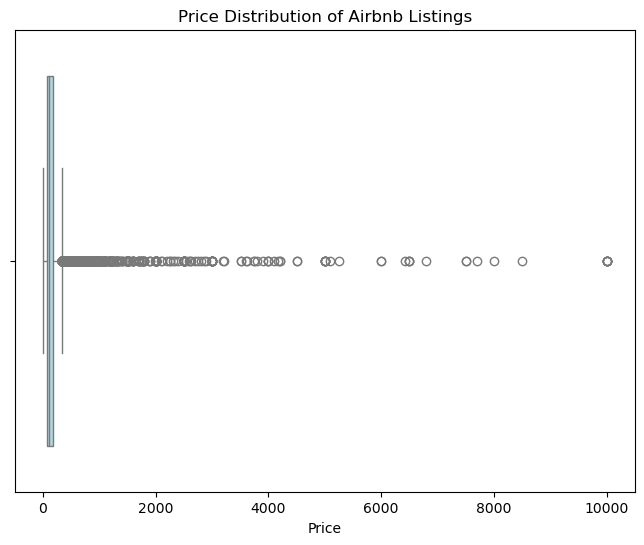

The chart has been saved as price_distribution_boxplot.png.


In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate price percentiles to find preferred pricing ranges
price_summary = df2['price'].describe(percentiles=[0.25, 0.5, 0.75])
print("Preferred pricing ranges based on percentiles:")
print(price_summary[['25%', '50%', '75%']])

# Boxplot to visualize price distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x=df2['price'], color='lightblue')
plt.title("Price Distribution of Airbnb Listings")
plt.xlabel('Price')

# Save the plot in the same folder as the notebook
plot_filename = 'price_distribution_boxplot.png'
plt.savefig(plot_filename)

# Show the plot
plt.show()

# Provide feedback on where the plot is saved
print(f"The chart has been saved as {plot_filename}.")


Property types analysis:
         room_type  count  avg_reviews
0  Entire home/apt  25392    22.834160
1     Private room  22296    24.089254
2      Shared room   1159    16.614323


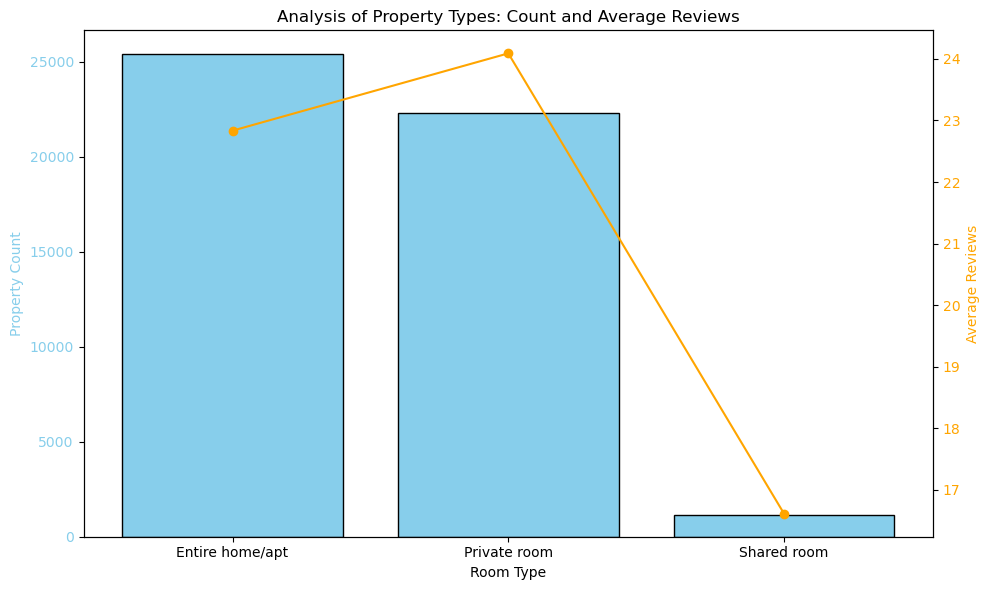

FileNotFoundError: [WinError 3] The system cannot find the path specified

In [110]:
import os

# Analyze room types based on count and average number of reviews
property_analysis = df2.groupby('room_type').agg(
    count=('id', 'count'),
    avg_reviews=('number_of_reviews', 'mean')
).reset_index()

# Display property analysis
print("Property types analysis:")
print(property_analysis)

# Visualization - Bar chart for the count and average number of reviews by room type
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for count of properties
ax1.bar(property_analysis['room_type'], property_analysis['count'], color='skyblue', edgecolor='black', label='Property Count')
ax1.set_xlabel('Room Type')
ax1.set_ylabel('Property Count', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Twin axis for average reviews
ax2 = ax1.twinx()
ax2.plot(property_analysis['room_type'], property_analysis['avg_reviews'], color='orange', marker='o', label='Average Reviews')
ax2.set_ylabel('Average Reviews', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title and layout
plt.title('Analysis of Property Types: Count and Average Reviews')
fig.tight_layout()

# Save the chart as a PNG file in the same folder where the notebook is saved
chart_path = 'property_analysis_chart.png'
plt.savefig(chart_path)

# Show the chart
plt.show()

# Provide download link
from shutil import move
move(chart_path, '/mnt/data/' + chart_path)



Property adjustments analysis:
         room_type  minimum_nights  availability_365  reviews_per_month
0  Entire home/apt        8.470384        111.908751           1.306410
1     Private room        5.382266        111.271529           1.444763
2      Shared room        6.479724        161.825712           1.471726


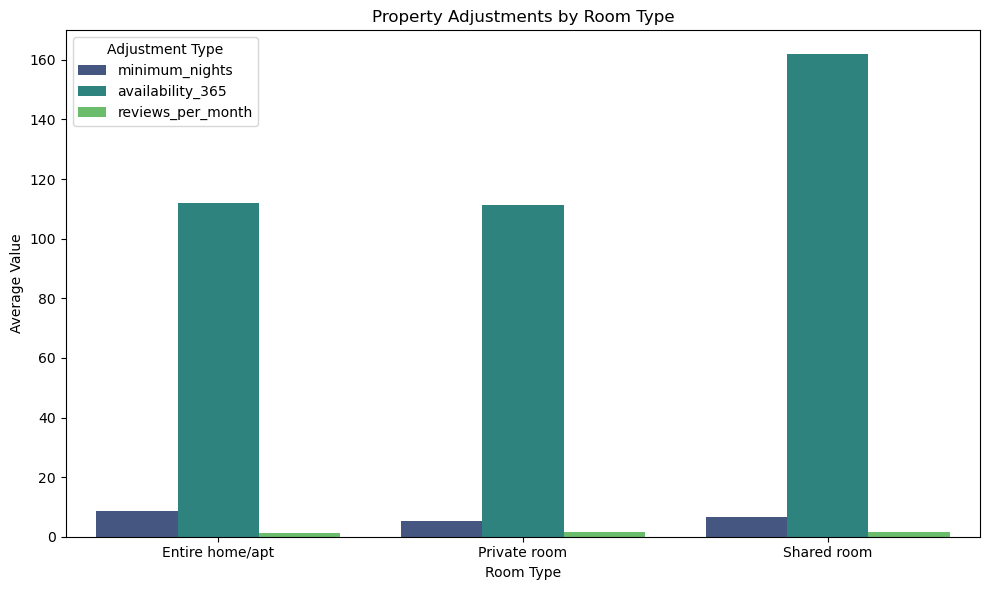

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze minimum nights and availability for adjustments
property_adjustments = df2[['room_type', 'minimum_nights', 'availability_365', 'reviews_per_month']].groupby('room_type').mean().reset_index()

# Display suggestions for property adjustments
print("Property adjustments analysis:")
print(property_adjustments)

# Create a grouped bar chart for all three features (minimum_nights, availability_365, reviews_per_month)
property_adjustments_melted = property_adjustments.melt(id_vars='room_type', 
                                                       value_vars=['minimum_nights', 'availability_365', 'reviews_per_month'], 
                                                       var_name='Adjustment Type', 
                                                       value_name='Value')

plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='Value', hue='Adjustment Type', data=property_adjustments_melted, palette='viridis')
plt.title('Property Adjustments by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Value')
plt.tight_layout()

# Save the plot to file
plt.savefig('Property_Adjustments_by_Room_Type.png')

# Display the plot
plt.show()


C:\Users\aniki\AppData\Local\Temp\ipykernel_14964\262424212.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='number_of_reviews', y='neighbourhood', data=popular_neighborhoods, palette='viridis')


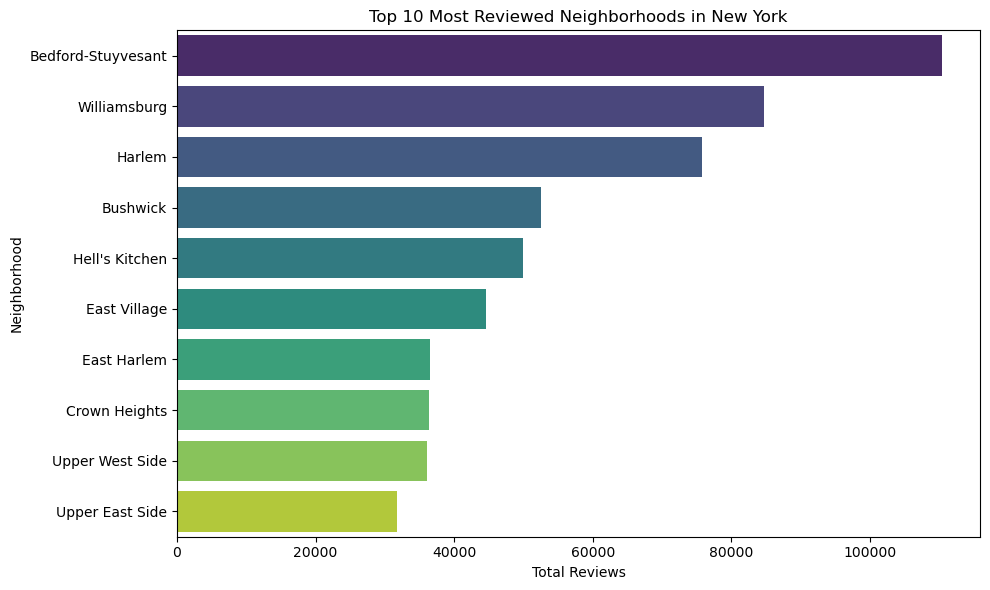

C:\Users\aniki\AppData\Local\Temp\ipykernel_14964\262424212.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='number_of_reviews', y='name', data=popular_properties, palette='coolwarm')


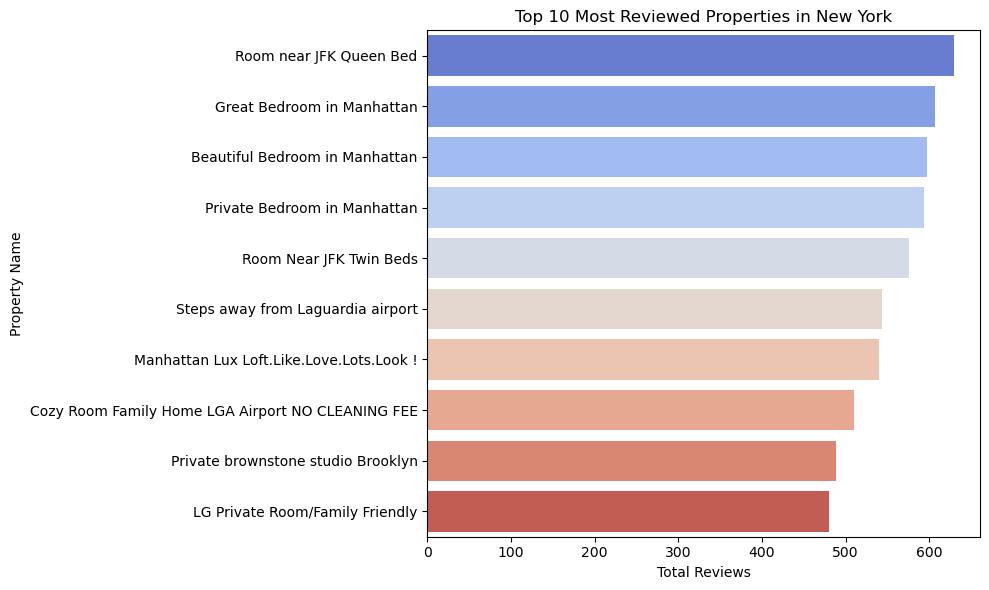

C:\Users\aniki\AppData\Local\Temp\ipykernel_14964\262424212.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_reviews', y='room_type', data=popular_room_types, palette='pastel')


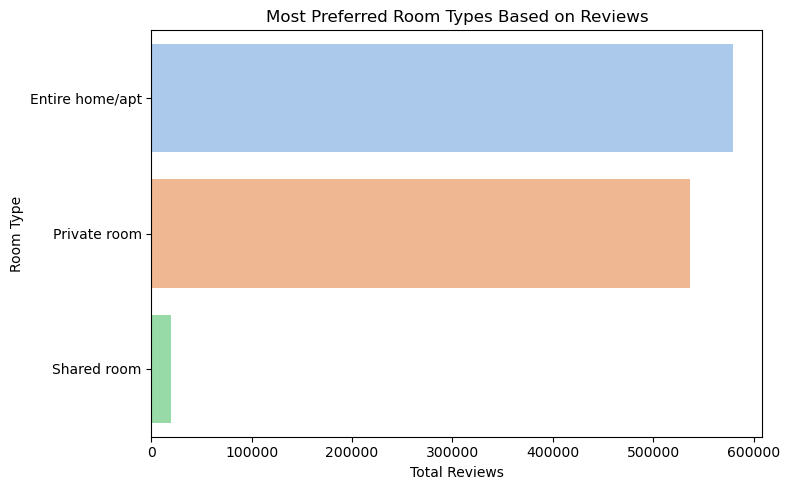

In [116]:
# Step 1: Top neighborhoods by total number of reviews
popular_neighborhoods = df2.groupby(['neighbourhood_group', 'neighbourhood'])['number_of_reviews'].sum().reset_index()
popular_neighborhoods = popular_neighborhoods.sort_values(by='number_of_reviews', ascending=False).head(10)

# Plot the top 10 neighborhoods
plt.figure(figsize=(10, 6))
sns.barplot(x='number_of_reviews', y='neighbourhood', data=popular_neighborhoods, palette='viridis')
plt.title("Top 10 Most Reviewed Neighborhoods in New York")
plt.xlabel('Total Reviews')
plt.ylabel('Neighborhood')
# Save the plot
plt.tight_layout()
plt.savefig("top_neighborhoods_reviews.png")
plt.show()

# Step 2: Top properties by number of reviews
popular_properties = df2[['name', 'neighbourhood', 'room_type', 'number_of_reviews']].sort_values(by='number_of_reviews', ascending=False).head(10)

# Plot the top 10 properties
plt.figure(figsize=(10, 6))
sns.barplot(x='number_of_reviews', y='name', data=popular_properties, palette='coolwarm')
plt.title("Top 10 Most Reviewed Properties in New York")
plt.xlabel('Total Reviews')
plt.ylabel('Property Name')
# Save the plot
plt.tight_layout()
plt.savefig("top_properties_reviews.png")
plt.show()

# Step 3: Most preferred room types by count and reviews
popular_room_types = df2.groupby('room_type').agg(
    count=('id', 'count'),
    total_reviews=('number_of_reviews', 'sum')
).reset_index().sort_values(by='total_reviews', ascending=False)

# Plot room types by total reviews
plt.figure(figsize=(8, 5))
sns.barplot(x='total_reviews', y='room_type', data=popular_room_types, palette='pastel')
plt.title("Most Preferred Room Types Based on Reviews")
plt.xlabel('Total Reviews')
plt.ylabel('Room Type')
# Save the plot
plt.tight_layout()
plt.savefig("preferred_room_types_reviews.png")
plt.show()